ATLANTA COMMUNITY FOOD BANK

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv("datasets/combined/nonprofit_combined.csv")

In [3]:
# print(df.head())
# print(df.columns)
postInfo = df['post_body_text']
postInfo.head()

0    • Medicaid\n• Meals on Wheels [provides meals ...
1    Savannah seniors can access Meals on Wheels fo...
2    SAVANNAH, Ga. (WSAV) - Many senior citizens pr...
3    SAVANNAH, Ga. (WSAV) - Many senior citizens pr...
4    Meals on Wheels is a vital service bringing we...
Name: post_body_text, dtype: object

ONE POSITIVE EXAMPLE
"We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"

In [4]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.9523


In [5]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "government"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.0


GETTING SENTIMENT SCORE FOR THE ENTIRE FILE (LINE PER LINE) AND SAVING IT TO A NEW CSV

In [23]:
import csv  # Import csv module for quoting options
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):  # Ensure input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return None  # Return None for non-text values

# Read the CSV file with proper quoting to handle commas inside strings
input_csv = 'datasets/combined/nonprofit_combined.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv, quotechar='"')  # Ensure proper reading of quoted text

# Apply the sentiment analysis to each line in the 'post_body_text' column
df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

# Verify the contents of the DataFrame
print(df.head())

# Write the results to a new CSV file with proper quoting for text fields
output_csv = 'datasets/combined/nonprofit_combined_output.csv'  # Replace with your desired output CSV file path
df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)  # Correct quoting usage

# Confirm the file was written
print(f"Output file saved to: {output_csv}")


      PostId                                            PostUrl   
0  458936458  https://www.facebook.com/IndianaPublicRadio/po...  \
1  455895406  https://www.facebook.com/saportareport/posts/p...   
2  455306415                       https://t.me/newsforce/57954   
3  437307118        https://www.youtube.com/watch?v=2wLDW6G0CqM   
4  413741657  https://www.facebook.com/ajc/posts/pfbid0tZzfK...   

   PostEngagement  Platform  ChannelID                       ChannelName   
0             NaN  Facebook   29409795              Indiana Public Radio  \
1             NaN  Facebook   30245494                     SaportaReport   
2             NaN  Telegram   26507888                       NEWSFORCE 🌎   
3             NaN   YouTube       3674               Atlanta News First    
4             NaN  Facebook   16547580  The Atlanta Journal-Constitution   

      ChannelUid     ChannelUrl   
0  blank_for_now  blank_for_now  \
1  blank_for_now  blank_for_now   
2  blank_for_now  blank_for_now   


GETTING A SUMMARIZED SENTIMENT SCORE FOR THE ENTIRE CSV, OTHER DESCRIPTIVE DATA?

Some basic visualizations

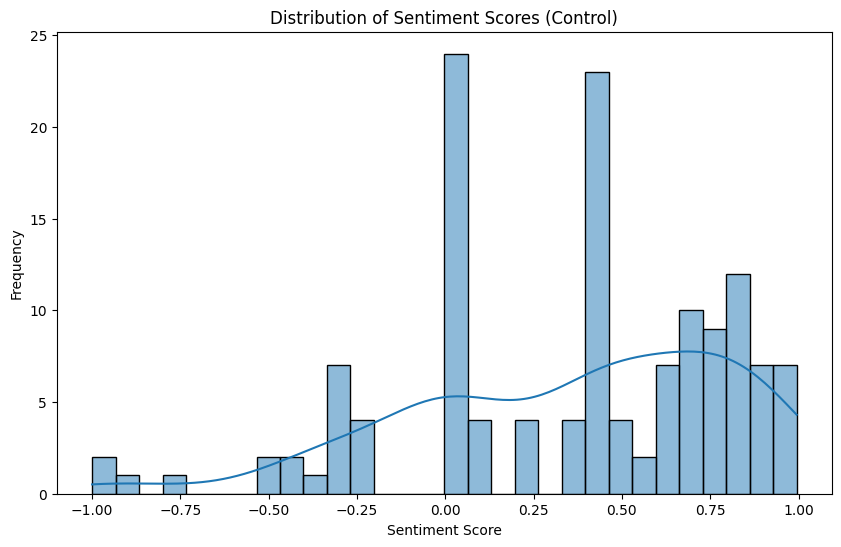

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file
df = pd.read_csv('datasets/combined/control_combined_output.csv')

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores (Control)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Save the figure before showing it
plt.savefig("graphs/controlSentiment.jpeg", dpi=300)  # Save with high resolution

# Display the plot
plt.show()


In [27]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv(output_csv)



# Group by 'Platform' and calculate the average sentiment score for each platform
average_sentiment = df.groupby('Platform')['sentiment'].mean()
print(average_sentiment.mean())

# Rename columns for clarity
average_sentiment.columns = ['Platform', 'AverageSentimentScore']
average_sentiment = average_sentiment.sort_values(by = 'AverageSentimentScore' , ascending=False)

print(average_sentiment)


0.3937798117575388


TypeError: Series.sort_values() got an unexpected keyword argument 'by'

      PostId                                            PostUrl   
0  458936458  https://www.facebook.com/IndianaPublicRadio/po...  \
1  455895406  https://www.facebook.com/saportareport/posts/p...   
2  455306415                       https://t.me/newsforce/57954   
3  437307118        https://www.youtube.com/watch?v=2wLDW6G0CqM   
4  413741657  https://www.facebook.com/ajc/posts/pfbid0tZzfK...   

   PostEngagement  Platform  ChannelID                       ChannelName   
0             NaN  Facebook   29409795              Indiana Public Radio  \
1             NaN  Facebook   30245494                     SaportaReport   
2             NaN  Telegram   26507888                       NEWSFORCE 🌎   
3             NaN   YouTube       3674               Atlanta News First    
4             NaN  Facebook   16547580  The Atlanta Journal-Constitution   

      ChannelUid     ChannelUrl   
0  blank_for_now  blank_for_now  \
1  blank_for_now  blank_for_now   
2  blank_for_now  blank_for_now   


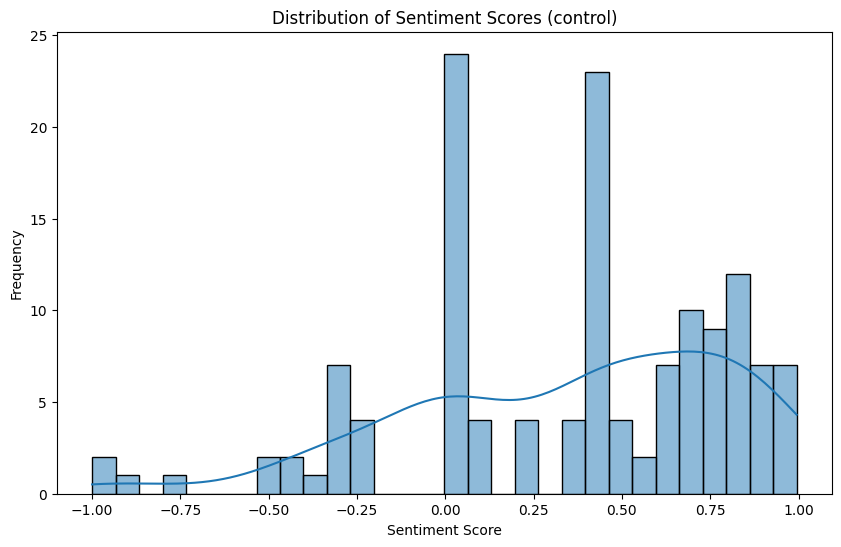

average sentiment for control:Platform
Telegram           0.950150
InstagramDirect    0.916720
FacebookDirect     0.776600
YouTube            0.439971
Facebook           0.416868
Twitter            0.255049
Rumble            -0.998900
Name: sentiment, dtype: float64
      PostId                                            PostUrl   
0  458661712        https://www.youtube.com/watch?v=mecIIha_BIk  \
1  458681633           https://www.instagram.com/p/DHLUnXlJa3q/   
2  456736042  https://twitter.com/AUG_Chronicle/status/18995...   
3  456562393  https://www.facebook.com/savannahnow/posts/pfb...   
4  456544787  https://twitter.com/SavannahNow/status/1899392...   

   PostEngagement         Platform  ChannelID   
0             NaN          YouTube    2853188  \
1             NaN  InstagramDirect   27205848   
2             NaN          Twitter    6887643   
3             NaN         Facebook   17964257   
4             NaN          Twitter    8100729   

                               Chan

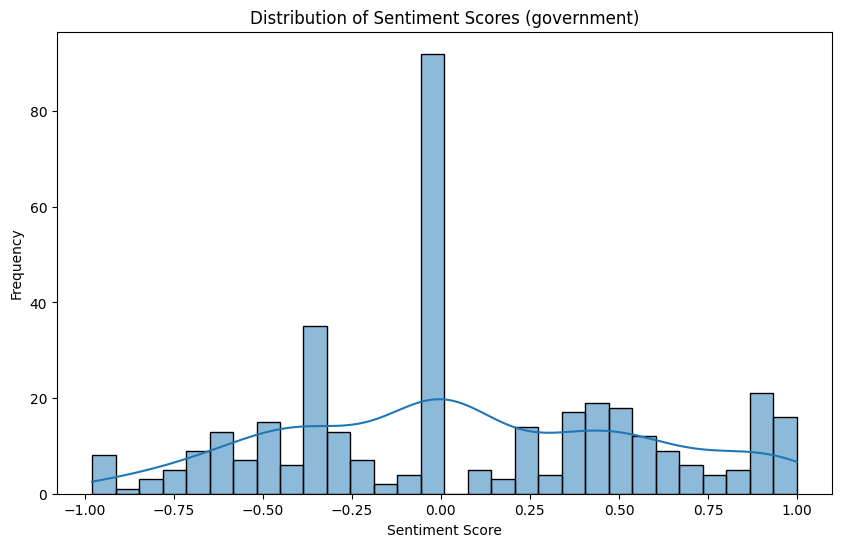

average sentiment for government:Platform
TikTok             0.406250
YouTube            0.343824
FacebookDirect     0.314668
InstagramDirect    0.174743
Instagram          0.130890
Facebook           0.100905
Threads            0.021750
Bluesky            0.000000
Twitter           -0.019200
Gab               -0.070233
Telegram          -0.147600
GETTR             -0.521100
TruthSocial       -0.585900
Name: sentiment, dtype: float64
      PostId                                            PostUrl   
0  425172109  https://bsky.app/profile/jenjams.bsky.social/p...  \
1  356895034  https://twitter.com/newsradiosav/status/185051...   
2  385538438  https://www.facebook.com/newsradiosavannah/pos...   
3  356638075  https://www.facebook.com/100039729025592/posts...   
4  299189598        https://www.youtube.com/watch?v=dQxaZy7kX30   

   PostEngagement        Platform  ChannelID                     ChannelName   
0             NaN         Bluesky   30312579                           Jenny  \

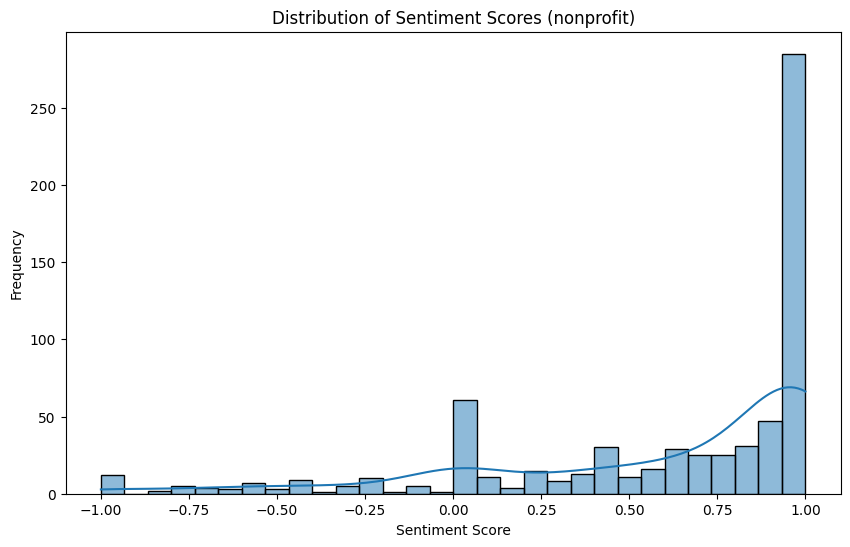

average sentiment for nonprofit:Platform
Podcast            0.930100
Rumble             0.886949
InstagramDirect    0.784272
Instagram          0.691450
Bluesky            0.685150
FacebookDirect     0.630030
Facebook           0.516203
YouTube            0.404465
TikTok             0.366900
Twitter            0.310242
Gab                0.071650
Telegram          -0.299700
Name: sentiment, dtype: float64
      PostId                                            PostUrl   
0   75155468  https://twitter.com/onlineathens/status/158853...  \
1  409731415        https://www.instagram.com/reel/DEr3BDNxxEB/   
2  375172034  https://www.facebook.com/SpartanburgCountyGove...   
3  237066221  https://www.facebook.com/100064380325443/posts...   
4  229503249  https://twitter.com/Univision23/status/1787575...   

   PostEngagement         Platform  ChannelID                 ChannelName   
0             NaN          Twitter    8100840        Athens Banner-Herald  \
1             NaN  InstagramDirect

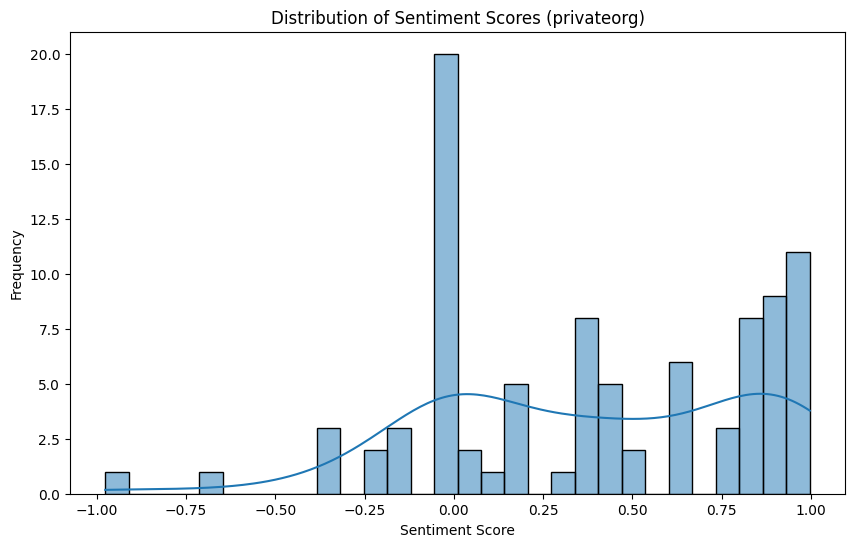

average sentiment for privateorg:Platform
InstagramDirect    0.905637
Instagram          0.718420
TikTok             0.670222
Facebook           0.303522
YouTube            0.278267
Twitter            0.221530
Name: sentiment, dtype: float64


In [35]:
dataset = ['control','government','nonprofit','privateorg']


import csv  # Import csv module for quoting options
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for data in dataset:
    # Create an instance of SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()

    # Function to get sentiment scores
    def get_sentiment_scores(text):
        if isinstance(text, str):  # Ensure input is a string
            scores = analyzer.polarity_scores(text)
            return scores['compound']
        else:
            return None  # Return None for non-text values

    # Read the CSV file with proper quoting to handle commas inside strings
    input_csv = 'datasets/combined/'+data+'_combined.csv'  # Replace with your input CSV file path
    df = pd.read_csv(input_csv, quotechar='"')  # Ensure proper reading of quoted text

    # Apply the sentiment analysis to each line in the 'post_body_text' column
    df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

    # Verify the contents of the DataFrame
    print(df.head())

    # Write the results to a new CSV file with proper quoting for text fields
    output_csv = 'datasets/combined/'+data+'_combined_output.csv'  # Replace with your desired output CSV file path
    df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)  # Correct quoting usage

    # Confirm the file was written
    print(f"Output file saved to: {output_csv}")



    # Read CSV file
    df = pd.read_csv('datasets/combined/'+data+'_combined_output.csv')

    # Plotting the distribution of sentiment scores
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], bins=30, kde=True)
    plt.title('Distribution of Sentiment Scores ('+data+')')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

    # Save the figure before showing it
    plt.savefig("graphs/"+data+"Sentiment.jpeg", dpi=300)  # Save with high resolution

    # Display the plot
    plt.show()


    # Read data from CSV file
    df = pd.read_csv(output_csv)



    # Group by 'Platform' and calculate the average sentiment score for each platform
    average_sentiment = df.groupby('Platform')['sentiment'].mean()

    # Sort the Series in descending order
    average_sentiment = average_sentiment.sort_values(ascending=False)

    # Print the sorted Series
    print('average sentiment for '+data+':'+str(average_sentiment))

